In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa #audio processing package
import librosa.display
import IPython.display as ipd #module contains functions and classes to work with multimedia content like audio, video, images, HTML, and more

## Loading audio files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
debussy_file = "drive/My Drive/MMA/Lab/piano_c.wav"
redhot_file = "drive/My Drive/MMA/Lab/tremolo.wav"
duke_file = "drive/My Drive/MMA/Lab/violin_c.wav"

In [5]:
ipd.Audio(debussy_file)

In [6]:
ipd.Audio(redhot_file)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
ipd.Audio(duke_file)

In [8]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file) #sampling rate-> sr
redhot, _ = librosa.load(redhot_file) #_ means same as above sr
duke, _ = librosa.load(duke_file)

In [9]:
print(sr) #cd quality audio

22050


## Basic information regarding audio files

In [10]:
debussy.shape

(33968,)

In [11]:
redhot.shape

(311295,)

In [12]:
duke.shape

(59772,)

In [13]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [14]:
# total number of samples in audio file
tot_samples = len(debussy)
tot_samples

33968

In [15]:
# total number of samples in audio file
tot_samples = len(redhot)
tot_samples

311295

In [16]:
# total number of samples in audio file
tot_samples = len(duke)
tot_samples

59772

In [17]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 2.710748299319728 seconds


## Visualising audio signal in the time domain

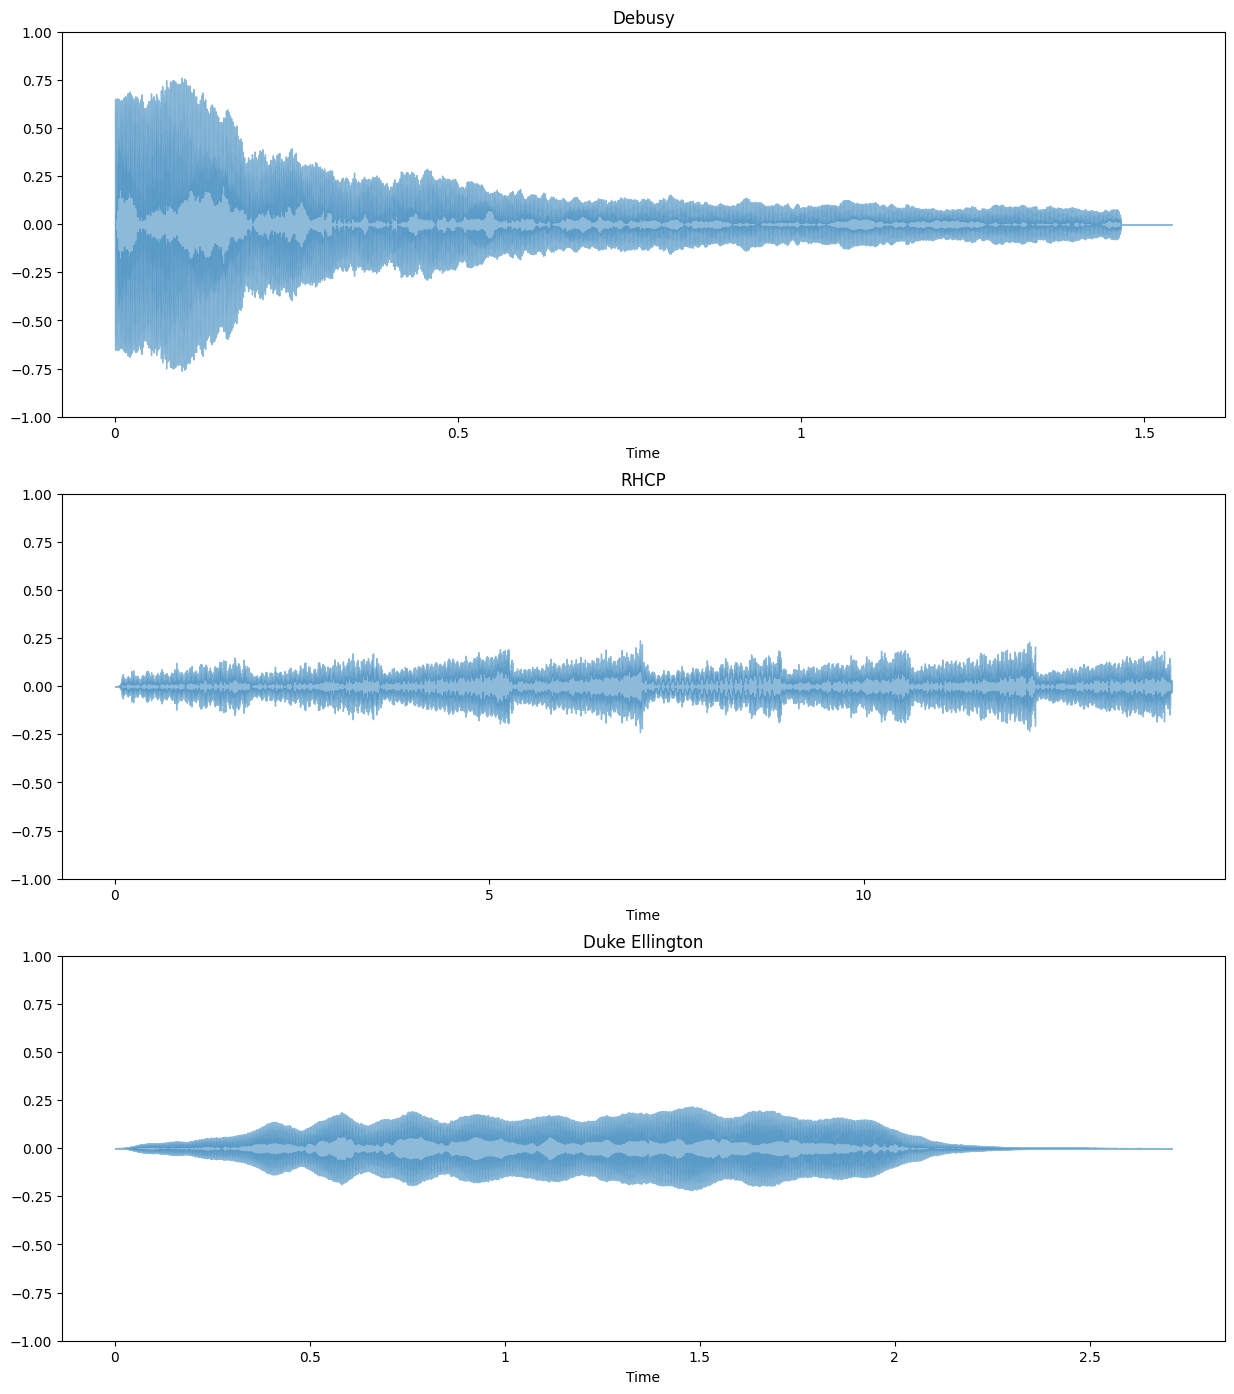

In [18]:
plt.figure(figsize=(15, 17)) #This line creates a new figure for plotting with Matplotlib and sets its size to 15 inches in width and 17 inches in height.

plt.subplot(3, 1, 1) #This line creates subplots within the figure.
                    #It specifies that there will be three subplots arranged in three rows and one column, and the current plot being referred to is the first subplot.
librosa.display.waveshow(debussy, alpha=0.5) #The alpha=0.5 parameter likely sets the transparency level of the waveform plot.
plt.ylim((-1, 1)) #it limits the y-axis from -1 to 1.
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## Calculating amplitude envelope

In [19]:
# This function amplitude_envelope is designed to compute the amplitude envelope
 #of a signal by dividing the signal into frames and calculating the maximum amplitude within each frame.

FRAME_SIZE = 1024 #no of samples in a frame
HOP_LENGTH = 512  #no of unique samples in my frame #windowing

# signal: The audio signal for which the amplitude envelope needs to be calculated.
# frame_size: The number of samples in each frame.
# hop_length: The number of samples by which the analysis window moves forward.


def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size and hop length."""
    amplitude_envelope = []

    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)

In [20]:
# The function returns the result directly without explicitly creating an empty list or using a loop
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [21]:
# number of frames in amplitude envelope
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
len(ae_debussy)

67

In [22]:
# calculate amplitude envelope for RHCP and Duke Ellington
ae_redhot = amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)
len(ae_redhot)

608

In [23]:
# number of frames in amplitude envelope
ae_duke = amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)
len(ae_duke)

117

## Visualising amplitude envelope

In [24]:
# This line creates a range of values starting from 0 to the length of the amplitude envelope of the Debussy signal (ae_debussy)
frames = range(len(ae_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
# This function is used to convert frame indices to their respective time values in seconds, considering the given hop length (HOP_LENGTH) between frames.

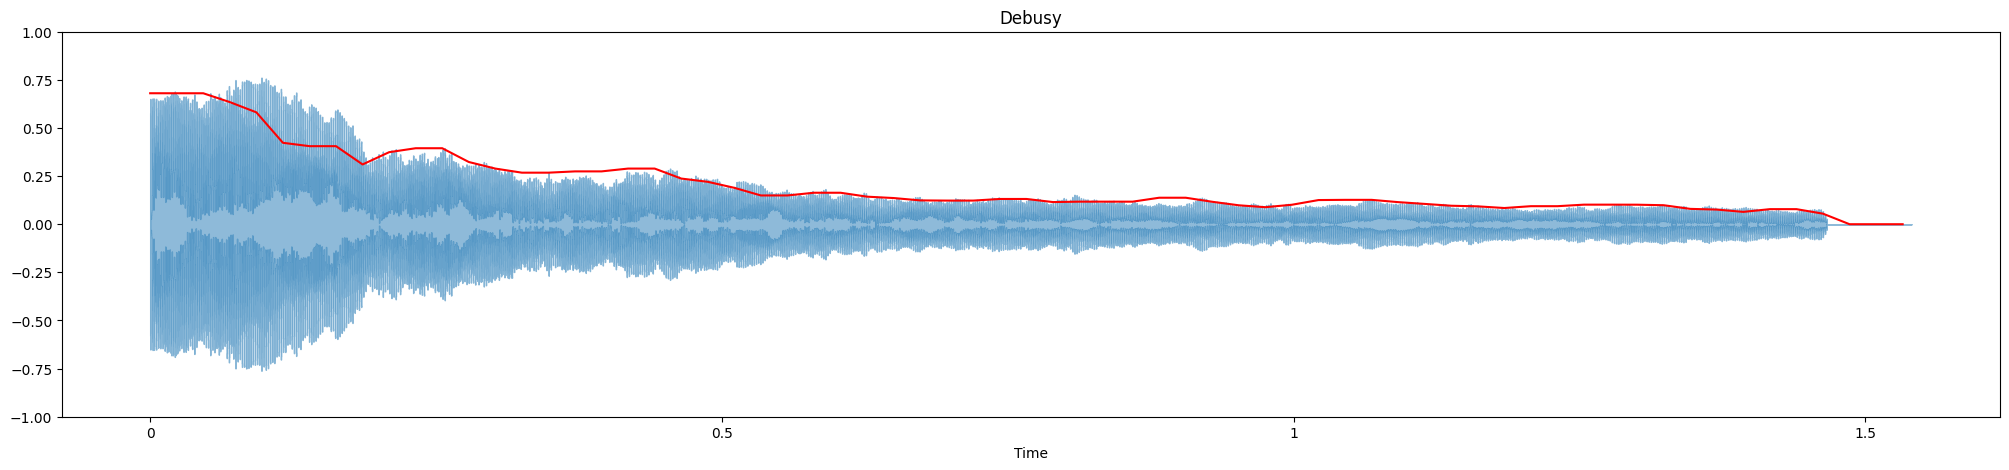

In [25]:
# amplitude envelope is graphed in red

plt.figure(figsize=(25, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, ae_debussy, color="r") #where the x-axis represents time in seconds (t) and the y-axis represents the amplitude values (ae_debussy).
                                   #The plot's line color would be red due to the specified color parameter.
plt.ylim((-1, 1))
plt.title("Debusy")

plt.show()

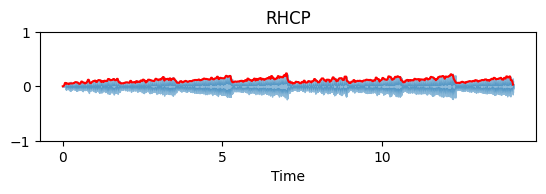

In [27]:
frames = range(len(ae_redhot))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")
plt.show()

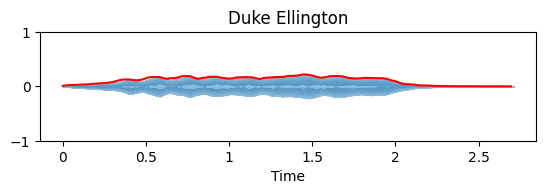

In [28]:
frames = range(len(ae_duke))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, ae_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")
plt.show()